In [2]:
# Cell 1: Imports and Style Configuration (Run once per session)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # We'll use regular expressions to parse log data

# --- Modern Plotting Style Configuration ---
# Set the overall theme
sns.set_theme(
    context='talk', # 'talk' is great for presentations: larger fonts and lines
    style='whitegrid', # A clean grid background
    palette='colorblind', # A colorblind-friendly and professional palette
    font='sans-serif'
)

# Set the figure size and resolution for all plots
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size in inches (width, height)
plt.rcParams['figure.dpi'] = 100 # Default figure resolution

print("✅ Setup complete. Libraries are imported and a modern plot style is set.")
print("Ready for your first log details and plot request!")

✅ Setup complete. Libraries are imported and a modern plot style is set.
Ready for your first log details and plot request!


In [2]:
# Cell 2: Data Processing for ResNet-50 Baseline
import json
import numpy as np # For finding the peak index

# The log data you provided in JSON format
log_details_json = """
{
    "experiment_name": "resnet50_baseline",
    "config_details": {
        "num_epochs": 30,
        "batch_size": 32,
        "learning_rate": 0.001,
        "num_workers": 4,
        "use_pretrained": true
    },
    "epoch_data": [
        {"epoch": 1, "train_loss": 5.722, "train_accuracy": 0.117, "val_loss": 3.952, "val_accuracy": 0.310, "training_duration_seconds": 211.5},
        {"epoch": 2, "train_loss": 3.647, "train_accuracy": 0.366, "val_loss": 2.500, "val_accuracy": 0.480, "training_duration_seconds": 212.6},
        {"epoch": 3, "train_loss": 2.689, "train_accuracy": 0.507, "val_loss": 1.956, "val_accuracy": 0.563, "training_duration_seconds": 178.8},
        {"epoch": 4, "train_loss": 2.201, "train_accuracy": 0.579, "val_loss": 1.720, "val_accuracy": 0.602, "training_duration_seconds": 178.9},
        {"epoch": 5, "train_loss": 1.901, "train_accuracy": 0.626, "val_loss": 1.572, "val_accuracy": 0.621, "training_duration_seconds": 178.1},
        {"epoch": 6, "train_loss": 1.711, "train_accuracy": 0.654, "val_loss": 1.519, "val_accuracy": 0.632, "training_duration_seconds": 175.3},
        {"epoch": 7, "train_loss": 1.577, "train_accuracy": 0.675, "val_loss": 1.465, "val_accuracy": 0.640, "training_duration_seconds": 167.0},
        {"epoch": 8, "train_loss": 1.452, "train_accuracy": 0.695, "val_loss": 1.437, "val_accuracy": 0.635, "training_duration_seconds": 178.8},
        {"epoch": 9, "train_loss": 1.364, "train_accuracy": 0.713, "val_loss": 1.448, "val_accuracy": 0.644, "training_duration_seconds": 171.5},
        {"epoch": 10, "train_loss": 1.293, "train_accuracy": 0.726, "val_loss": 1.418, "val_accuracy": 0.643, "training_duration_seconds": 194.7},
        {"epoch": 11, "train_loss": 1.224, "train_accuracy": 0.736, "val_loss": 1.434, "val_accuracy": 0.638, "training_duration_seconds": 175.9},
        {"epoch": 12, "train_loss": 1.164, "train_accuracy": 0.748, "val_loss": 1.425, "val_accuracy": 0.649, "training_duration_seconds": 172.0},
        {"epoch": 13, "train_loss": 1.122, "train_accuracy": 0.759, "val_loss": 1.424, "val_accuracy": 0.640, "training_duration_seconds": 172.0},
        {"epoch": 14, "train_loss": 1.065, "train_accuracy": 0.768, "val_loss": 1.422, "val_accuracy": 0.6495, "training_duration_seconds": 172.3},
        {"epoch": 15, "train_loss": 1.037, "train_accuracy": 0.775, "val_loss": 1.439, "val_accuracy": 0.644, "training_duration_seconds": 172.0},
        {"epoch": 16, "train_loss": 0.997, "train_accuracy": 0.783, "val_loss": 1.448, "val_accuracy": 0.639, "training_duration_seconds": 187.4},
        {"epoch": 17, "train_loss": 0.966, "train_accuracy": 0.790, "val_loss": 1.476, "val_accuracy": 0.635, "training_duration_seconds": 184.7},
        {"epoch": 18, "train_loss": 0.948, "train_accuracy": 0.793, "val_loss": 1.481, "val_accuracy": 0.635, "training_duration_seconds": 177.3},
        {"epoch": 19, "train_loss": 0.910, "train_accuracy": 0.804, "val_loss": 1.493, "val_accuracy": 0.636, "training_duration_seconds": 173.9},
        {"epoch": 20, "train_loss": 0.878, "train_accuracy": 0.809, "val_loss": 1.476, "val_accuracy": 0.640, "training_duration_seconds": 173.3},
        {"epoch": 21, "train_loss": 0.863, "train_accuracy": 0.814, "val_loss": 1.511, "val_accuracy": 0.630, "training_duration_seconds": 173.3},
        {"epoch": 22, "train_loss": 0.843, "train_accuracy": 0.819, "val_loss": 1.513, "val_accuracy": 0.640, "training_duration_seconds": 172.0},
        {"epoch": 23, "train_loss": 0.814, "train_accuracy": 0.823, "val_loss": 1.525, "val_accuracy": 0.637, "training_duration_seconds": 172.1},
        {"epoch": 24, "train_loss": 0.788, "train_accuracy": 0.830, "val_loss": 1.523, "val_accuracy": 0.628, "training_duration_seconds": 175.0},
        {"epoch": 25, "train_loss": 0.778, "train_accuracy": 0.831, "val_loss": 1.555, "val_accuracy": 0.628, "training_duration_seconds": 173.6},
        {"epoch": 26, "train_loss": 0.767, "train_accuracy": 0.836, "val_loss": 1.561, "val_accuracy": 0.630, "training_duration_seconds": 173.3},
        {"epoch": 27, "train_loss": 0.742, "train_accuracy": 0.841, "val_loss": 1.577, "val_accuracy": 0.623, "training_duration_seconds": 173.6},
        {"epoch": 28, "train_loss": 0.722, "train_accuracy": 0.847, "val_loss": 1.575, "val_accuracy": 0.619, "training_duration_seconds": 175.4},
        {"epoch": 29, "train_loss": 0.710, "train_accuracy": 0.846, "val_loss": 1.562, "val_accuracy": 0.637, "training_duration_seconds": 177.7},
        {"epoch": 30, "train_loss": 0.705, "train_accuracy": 0.850, "val_loss": 1.588, "val_accuracy": 0.628, "training_duration_seconds": 179.1}
    ]
}
"""

# Load the JSON data from the string
log_data = json.loads(log_details_json)

# Create a DataFrame from the 'epoch_data' list of dictionaries
df_baseline = pd.DataFrame.from_records(log_data['epoch_data'])

# --- Find the point of peak validation accuracy for the annotation ---
# We'll get the index of the row with the maximum validation accuracy
peak_idx = df_baseline['val_accuracy'].idxmax()
# Use that index to get the corresponding epoch and accuracy values
peak_epoch = df_baseline.loc[peak_idx, 'epoch']
peak_val_acc = df_baseline.loc[peak_idx, 'val_accuracy']

print("Data processed successfully. Peak validation accuracy found:")
print(f"  - Epoch: {peak_epoch}")
print(f"  - Accuracy: {peak_val_acc:.4f}")

# Display the DataFrame to verify
df_baseline.head()

Data processed successfully. Peak validation accuracy found:
  - Epoch: 14
  - Accuracy: 0.6495


,epoch,train_loss,train_accuracy,val_loss,val_accuracy,training_duration_seconds
0,1,5.722,0.117,3.952,0.310,211.5
1,2,3.647,0.366,2.500,0.480,212.6
2,3,2.689,0.507,1.956,0.563,178.8
3,4,2.201,0.579,1.720,0.602,178.9
4,5,1.901,0.626,1.572,0.621,178.1


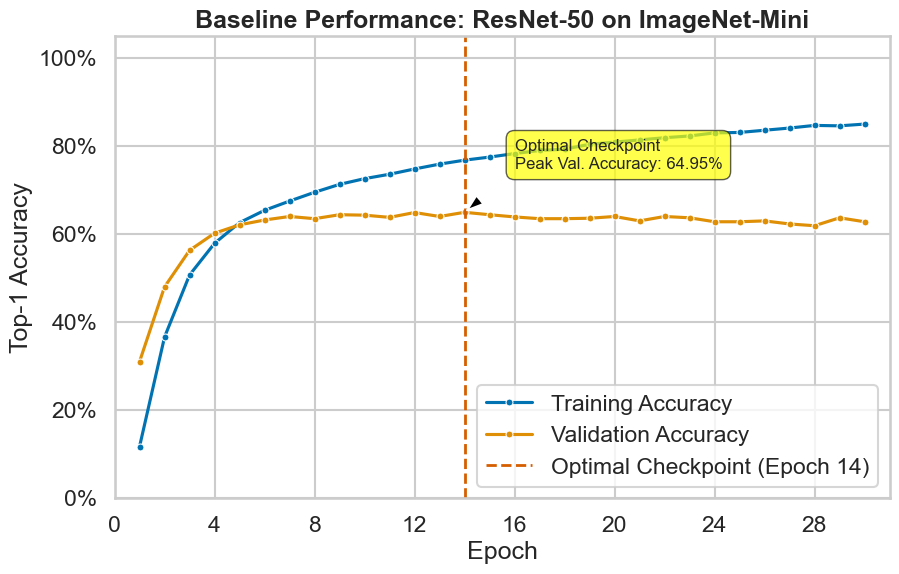

✅ Plot saved as 'resnet50_baseline_accuracy_overfitting_plot.png'


In [3]:
# Cell 3: Plotting and Saving the Baseline Performance Graph
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator

# Create the plot using the style we configured
fig, ax = plt.subplots()

# Plot the training and validation accuracy curves
sns.lineplot(data=df_baseline, x='epoch', y='train_accuracy', marker='o', markersize=5, label='Training Accuracy', ax=ax)
sns.lineplot(data=df_baseline, x='epoch', y='val_accuracy', marker='o', markersize=5, label='Validation Accuracy', ax=ax)

# --- Add the annotations and labels as requested ---

# 1. Add a vertical dashed line at the peak epoch
plt.axvline(x=peak_epoch, color='r', linestyle='--', linewidth=2, label=f'Optimal Checkpoint (Epoch {peak_epoch})')

# 2. Add the annotation text
annotation_text = f"Optimal Checkpoint\nPeak Val. Accuracy: {peak_val_acc*100:.2f}%"
plt.annotate(
    text=annotation_text,
    xy=(peak_epoch, peak_val_acc), # The point to annotate
    xytext=(peak_epoch + 2, peak_val_acc + 0.1), # Position of the text
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="yellow", ec="k", lw=1, alpha=0.7)
)

# 3. Set titles and labels
plt.title('Baseline Performance: ResNet-50 on ImageNet-Mini', fontsize=18, weight='bold')
plt.xlabel('Epoch')
plt.ylabel('Top-1 Accuracy')

# 4. Format the Y-axis to show percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
ax.set_ylim(0, 1.05) # Set Y-axis limit from 0% to 105%

# 5. Ensure X-axis ticks are integers
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(0, df_baseline['epoch'].max() + 1) # Set X-axis limit

# Display the legend
plt.legend(loc='lower right')
plt.grid(True) # Ensure the grid is visible

# --- Save the Plot ---
# Using a descriptive filename for easy reference
file_name = 'resnet50_baseline_accuracy_overfitting_plot.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

# Display the plot in the notebook
plt.show()

print(f"✅ Plot saved as '{file_name}'")

In [9]:
# Cell 4: Data Processing for One-Shot Pruning Experiments

# The log data for the three one-shot pruning experiments
logs_json = {
    '50%': """
    {
        "experiment_name": "resnet50_prune_unstruct_os_l1_sp50_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.6528}, {"epoch": 2, "val_accuracy": 0.6533}, {"epoch": 3, "val_accuracy": 0.6535}, {"epoch": 4, "val_accuracy": 0.6556}, {"epoch": 5, "val_accuracy": 0.6604}, {"epoch": 6, "val_accuracy": 0.6581}, {"epoch": 7, "val_accuracy": 0.6609}, {"epoch": 8, "val_accuracy": 0.6591}, {"epoch": 9, "val_accuracy": 0.6647}, {"epoch": 10, "val_accuracy": 0.6663}, {"epoch": 11, "val_accuracy": 0.6635}, {"epoch": 12, "val_accuracy": 0.6632}, {"epoch": 13, "val_accuracy": 0.6640}, {"epoch": 14, "val_accuracy": 0.6617}, {"epoch": 15, "val_accuracy": 0.6645}]
    }
    """,
    '75%': """
    {
        "experiment_name": "resnet50_prune_unstruct_os_l1_sp75_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.5921}, {"epoch": 2, "val_accuracy": 0.5987}, {"epoch": 3, "val_accuracy": 0.6069}, {"epoch": 4, "val_accuracy": 0.6094}, {"epoch": 5, "val_accuracy": 0.6087}, {"epoch": 6, "val_accuracy": 0.6130}, {"epoch": 7, "val_accuracy": 0.6161}, {"epoch": 8, "val_accuracy": 0.6145}, {"epoch": 9, "val_accuracy": 0.6189}, {"epoch": 10, "val_accuracy": 0.6173}, {"epoch": 11, "val_accuracy": 0.6194}, {"epoch": 12, "val_accuracy": 0.6191}, {"epoch": 13, "val_accuracy": 0.6247}, {"epoch": 14, "val_accuracy": 0.6209}, {"epoch": 15, "val_accuracy": 0.6240}]
    }
    """,
    '90%': """
    {
        "experiment_name": "resnet50_prune_unstruct_os_l1_sp90_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.2337}, {"epoch": 2, "val_accuracy": 0.2709}, {"epoch": 3, "val_accuracy": 0.2967}, {"epoch": 4, "val_accuracy": 0.3150}, {"epoch": 5, "val_accuracy": 0.3339}, {"epoch": 6, "val_accuracy": 0.3428}, {"epoch": 7, "val_accuracy": 0.3655}, {"epoch": 8, "val_accuracy": 0.3675}, {"epoch": 9, "val_accuracy": 0.3838}, {"epoch": 10, "val_accuracy": 0.3866}, {"epoch": 11, "val_accuracy": 0.3940}, {"epoch": 12, "val_accuracy": 0.4058}, {"epoch": 13, "val_accuracy": 0.4093}, {"epoch": 14, "val_accuracy": 0.4157}, {"epoch": 15, "val_accuracy": 0.4183}]
    }
    """
}

# Process each log and store it in a list of DataFrames
all_dfs = []
for sparsity, json_str in logs_json.items():
    # Load the JSON data
    data = json.loads(json_str)
    # Create a DataFrame
    df = pd.DataFrame.from_records(data['epoch_data'])
    # Add a column to identify the sparsity level for this experiment
    df['Sparsity'] = sparsity
    # Add this DataFrame to our list
    all_dfs.append(df)

# Concatenate all individual DataFrames into a single one
df_all_pruning = pd.concat(all_dfs, ignore_index=True)

# Define the baseline accuracy from the previous experiment
baseline_acc = 0.6495

print("✅ Data processed and combined. Ready for plotting.")
# Display the combined DataFrame to verify
df_all_pruning.tail()

✅ Data processed and combined. Ready for plotting.


,epoch,val_accuracy,Sparsity
40,11,0.3940,90%
41,12,0.4058,90%
42,13,0.4093,90%
43,14,0.4157,90%
44,15,0.4183,90%


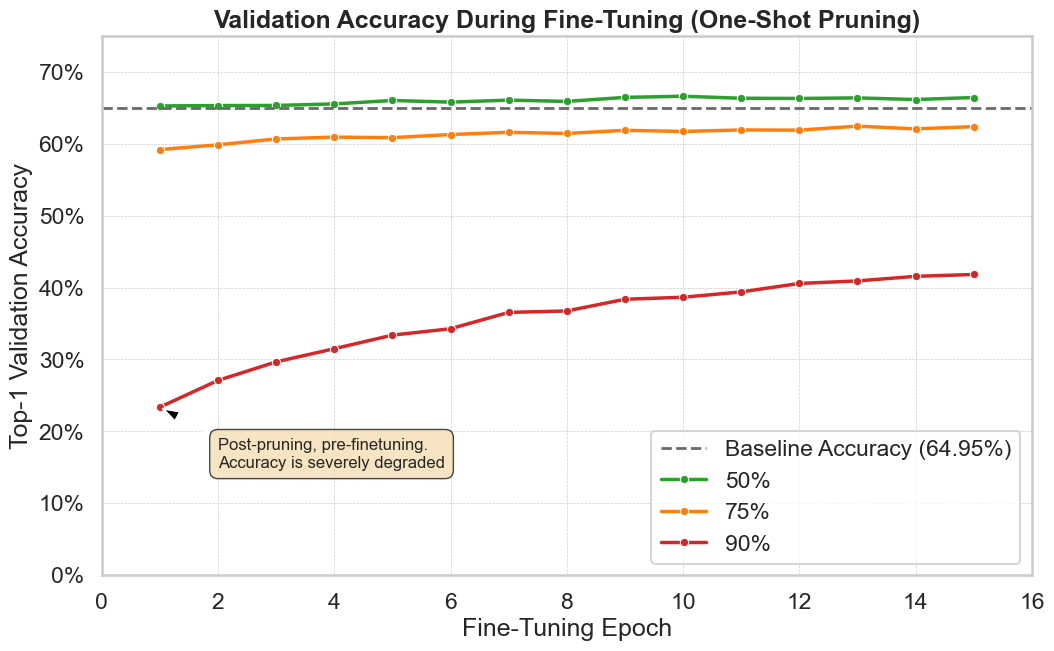

✅ Plot saved as 'unstructured_pruning_oneshot_recovery.png'


In [15]:
# Cell 5: Plotting the Accuracy Recovery Curves
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7)) # A slightly wider plot

# Define a custom color palette as requested
color_palette = {
    '50%': '#2ca02c', # Green
    '75%': '#ff7f0e', # Orange
    '90%': '#d62728'  # Red
}

# Plot all three recovery curves using seaborn.
# 'hue' will create a separate line for each unique value in the 'Sparsity' column.
sns.lineplot(
    data=df_all_pruning,
    x='epoch',
    y='val_accuracy',
    hue='Sparsity',
    hue_order=['50%', '75%', '90%'], # Ensure a consistent legend order
    palette=color_palette,
    marker='o',
    markersize=6,
    linewidth=2.5,
    ax=ax
)

# --- Add annotations and styling ---

# 1. Add the horizontal dashed line for the baseline accuracy
ax.axhline(
    y=baseline_acc,
    color='dimgray',
    linestyle='--',
    linewidth=2,
    label=f'Baseline Accuracy ({baseline_acc*100:.2f}%)'
)

# 2. Add the annotation for the initial accuracy drop
# We'll point the arrow at the first data point of the most damaged model (90% sparsity)
ax.annotate(
    text='Post-pruning, pre-finetuning.\nAccuracy is severely degraded',
    xy=(1, df_all_pruning[df_all_pruning['Sparsity'] == '90%']['val_accuracy'].iloc[0]), # Arrow tip
    xytext=(2, 0.15),  # Text position
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    ha='left',
    bbox=dict(boxstyle="round,pad=0.5", fc="wheat", ec="k", lw=1, alpha=0.8)
)


# 3. Set titles and labels for clarity and impact
plt.title('Validation Accuracy During Fine-Tuning (One-Shot Pruning)', fontsize=18, weight='bold')
plt.xlabel('Fine-Tuning Epoch')
plt.ylabel('Top-1 Validation Accuracy')

# 4. Format the axes for readability
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
ax.set_ylim(0, 0.75) # Set Y-axis limit to zoom in on the relevant area
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(0, df_all_pruning['epoch'].max() + 1)

# 5. Customize and display the legend
# We need to re-order the legend handles to put the baseline first
handles, labels = ax.get_legend_handles_labels()
order = [3, 0, 1, 2] # Manually set order: Baseline, 50%, 75%, 90%
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='lower right')

plt.grid(True, which='major', linestyle='--', linewidth=0.5)

# --- Save the Plot ---
file_name = 'unstructured_pruning_oneshot_recovery.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

# Display the plot in the notebook
plt.show()

print(f"✅ Plot saved as '{file_name}'")

In [16]:
# Cell 6: Data Processing for Comparison Chart

# --- Data from the new "Iterative Pruning" logs ---
iterative_logs_json = [
    """
    {
        "config_details": {"target_sparsity_for_this_stage": 0.5},
        "training_summary": {"best_val_accuracy_in_stage": 0.6604639306653072}
    }
    """,
    """
    {
        "config_details": {"target_sparsity_for_this_stage": 0.75},
        "training_summary": {"best_val_accuracy_in_stage": 0.6214631659444303}
    }
    """,
    """
    {
        "config_details": {"target_sparsity_for_this_stage": 0.9},
        "training_summary": {"best_val_accuracy_in_stage": 0.4649502931430028}
    }
    """
]

# Parse the iterative logs to extract final accuracy for each stage
iterative_results = []
for log_str in iterative_logs_json:
    data = json.loads(log_str)
    sparsity = data['config_details']['target_sparsity_for_this_stage']
    accuracy = data['training_summary']['best_val_accuracy_in_stage']
    iterative_results.append({
        'Sparsity Level': f"{int(sparsity*100)}%",
        'Accuracy': accuracy,
        'Method': 'Iterative'
    })


# --- Data from the previous "One-Shot Pruning" experiment (from your slide notes) ---
one_shot_results = [
    {'Sparsity Level': '50%', 'Accuracy': 0.6645, 'Method': 'One-Shot'},
    {'Sparsity Level': '75%', 'Accuracy': 0.6240, 'Method': 'One-Shot'},
    {'Sparsity Level': '90%', 'Accuracy': 0.4183, 'Method': 'One-Shot'}
]

# Combine both result sets into a single DataFrame
df_comparison = pd.DataFrame(one_shot_results + iterative_results)

print("✅ Data for comparison chart is ready.")
df_comparison

✅ Data for comparison chart is ready.


,Sparsity Level,Accuracy,Method
0,50%,0.664500,One-Shot
1,75%,0.624000,One-Shot
2,90%,0.418300,One-Shot
3,50%,0.660464,Iterative
4,75%,0.621463,Iterative
5,90%,0.464950,Iterative


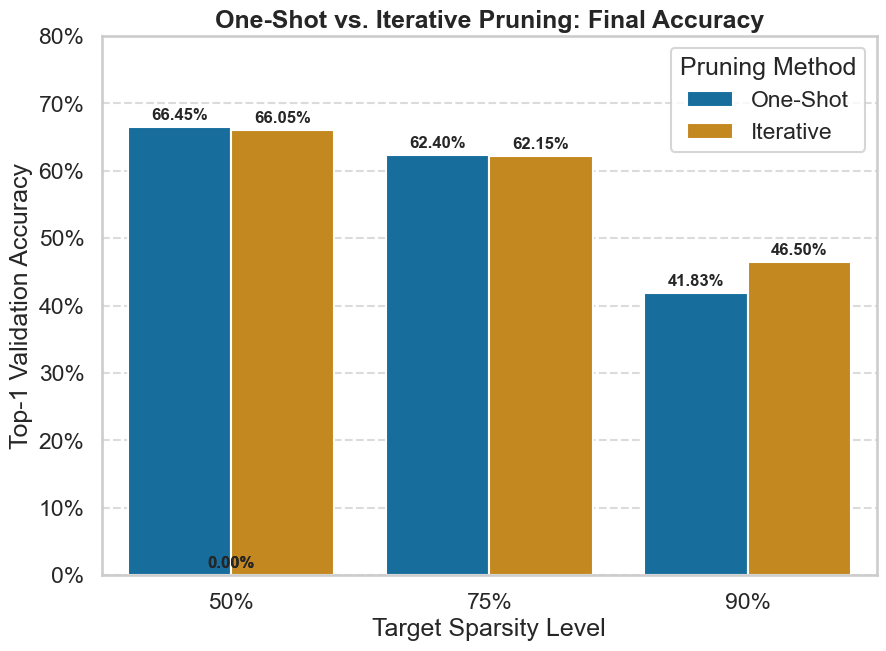

✅ Plot saved as 'oneshot_vs_iterative_pruning_comparison.png'


In [17]:
# Cell 7: Plotting the One-Shot vs. Iterative Bar Chart
import matplotlib.ticker as mticker

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Generate the grouped bar plot
# Seaborn automatically handles the grouping based on the 'hue' parameter.
sns.barplot(
    data=df_comparison,
    x='Sparsity Level',
    y='Accuracy',
    hue='Method',
    ax=ax,
    order=['50%', '75%', '90%'] # Ensure the x-axis is correctly ordered
)

# --- Add annotations and styling ---

# 1. Add data labels on top of each bar for clarity
for bar in ax.patches:
    ax.annotate(
        text=f"{bar.get_height() * 100:.2f}%", # Format text as percentage
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), # Position
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=12,
        weight='bold'
    )

# 2. Set titles and labels
plt.title('One-Shot vs. Iterative Pruning: Final Accuracy', fontsize=18, weight='bold')
plt.xlabel('Target Sparsity Level')
plt.ylabel('Top-1 Validation Accuracy')

# 3. Format the Y-axis to show percentages and set limits
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
ax.set_ylim(0, 0.8) # Give space for the annotations on top of the bars

# 4. Customize and position the legend
ax.legend(title='Pruning Method', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for easier comparison

# --- Save the Plot ---
file_name = 'oneshot_vs_iterative_pruning_comparison.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

# Display the plot in the notebook
plt.show()

print(f"✅ Plot saved as '{file_name}'")

In [18]:
# Cell 8 (Revised): Comprehensive Data Aggregation
from io import StringIO
import pandas as pd

# --- Data Block 1: Accuracy and Parameter Stats (Semicolon-separated) ---
accuracy_data_str = """
Experiment_ID;Base_Model_Arch;Optimization_Category;Specific_Technique;Key_Parameters;Top_1_Acc;Top_5_Acc;Model_Size_MB_Disk;FT_Epochs_Run;FT_Time_seconds;flops_gmacs;params_millions;non_zero_params;Notes_from_Log
resnet50_prune_unstruct_it_l1_stage1_sp50_ft;ResNet50;Pruning;Iterative Unstructured Pruning (L1);Target Sparsity: 50.0%;0.6605647208768799389;0.853138;97.79218;5;665.13087;4.133742592;25.557032;12.752456;
resnet50_prune_unstruct_it_l1_stage2_sp75_ft;ResNet50;Pruning;Iterative Unstructured Pruning (L1);Target Sparsity: 75.0%;0.6194745347947998981;0.79276;97.79218;10;1337.13718;4.133742592;25.557032;6.376728;
resnet50_prune_unstruct_it_l1_stage3_sp90_ft;ResNet50;Pruning;Iterative Unstructured Pruning (L1);Target Sparsity: 90.0%;0.4649502931430028;0.7519755;97.80362;15;2093.07571;4.133742592;25.557032;2.551291;
resnet50_prune_unstruct_os_l1_sp50_ft;ResNet50;Pruning;One-Shot Unstructured Pruning (L1);Target Sparsity: 50.0%;0.6645424420086669;0.8860566;97.80331;15;2085.63127;4.133742592;25.557032;12.752456;
resnet50_prune_unstruct_os_l1_sp75_ft;ResNet50;Pruning;One-Shot Unstructured Pruning (L1);Target Sparsity: 75.0%;0.6240122355340301;0.8598012;97.80331;15;1945.38252;4.133742592;25.557032;6.376728;
resnet50_prune_unstruct_os_l1_sp90_ft;ResNet50;Pruning;One-Shot Unstructured Pruning (L1);Target Sparsity: 90.0%;0.41830231965332654;0.7122100;97.80331;15;2004.42808;4.133742592;25.557032;2.551291;
resnet50_baseline;ResNet50;Baseline;Baseline;N/A;0.649502931430028;0.8748407;97.79614;30;5395.38120;4.133742592;25.557032;25.557032;
"""

# --- Data Block 2: Performance Stats (Comma-separated) ---
performance_data_str = """
Model,Device,Base_Model_Arch,Optimization_Category,Latency (ms),Throughput (FPS),Size (MB),GPU Mem (MB),Full_Model_Name
R50-P.Unstruct-OS-sp90,GPU,ResNet50,Pruning (Unstructured),34.82609596252441,918.8511980910662,97.80330848693848,443.60302734375,resnet50_prune_unstruct_os_l1_sp90_ft
R50-P.Unstruct-OS-sp75,GPU,ResNet50,Pruning (Unstructured),35.011267471313474,913.9914750649699,97.80330848693848,443.60302734375,resnet50_prune_unstruct_os_l1_sp75_ft
R50-P.Unstruct-IT-sp90,GPU,ResNet50,Pruning (Unstructured),35.079964828491214,912.2015987316574,97.80361747741699,443.60302734375,resnet50_prune_unstruct_it_l1_stage3_sp90_ft
R50-P.Unstruct-IT-sp75,GPU,ResNet50,Pruning (Unstructured),35.091973876953126,911.8894283976485,97.79217720031738,443.60302734375,resnet50_prune_unstruct_it_l1_stage2_sp75_ft
R50-P.Unstruct-OS-sp50,GPU,ResNet50,Pruning (Unstructured),35.37477798461914,904.5993168893813,97.80330848693848,443.60302734375,resnet50_prune_unstruct_os_l1_sp50_ft
R50-P.Unstruct-IT-sp50,GPU,ResNet50,Pruning (Unstructured),35.48617935180664,901.7595183396616,97.79217720031738,446.10302734375,resnet50_prune_unstruct_it_l1_stage1_sp50_ft
R50-P.Unstruct-IT-sp75,CPU,ResNet50,Pruning (Unstructured),2355.324690199995,13.586237232236044,97.79217720031738,N/A,resnet50_prune_unstruct_it_l1_stage2_sp75_ft
R50-P.Unstruct-OS-sp50,CPU,ResNet50,Pruning (Unstructured),2358.7750044999893,13.56636387063264,97.80330848693848,N/A,resnet50_prune_unstruct_os_l1_sp50_ft
R50-P.Unstruct-OS-sp90,CPU,ResNet50,Pruning (Unstructured),2365.8638610000253,13.52571486783434,97.80330848693848,N/A,resnet50_prune_unstruct_os_l1_sp90_ft
R50-P.Unstruct-IT-sp90,CPU,ResNet50,Pruning (Unstructured),2368.076406,13.513077499915768,97.80361747741699,N/A,resnet50_prune_unstruct_it_l1_stage3_sp90_ft
R50-P.Unstruct-IT-sp50,CPU,ResNet50,Pruning (Unstructured),2368.8507468999887,13.508660282576688,97.79217720031738,N/A,resnet50_prune_unstruct_it_l1_stage1_sp50_ft
R50-P.Unstruct-OS-sp75,CPU,ResNet50,Pruning (Unstructured),2373.1224130999863,13.484344433036945,97.80330848693848,N/A,resnet50_prune_unstruct_os_l1_sp75_ft
R50-Baseline,GPU,ResNet50,Baseline,35.01955871582031,913.7750780835452,97.79614067077637,443.60302734375,resnet50_baseline
R50-Baseline,CPU,ResNet50,Baseline,2369.790580200015,13.50330289408912,97.79614067077637,N/A,resnet50_baseline
"""

# Load data into DataFrames
df_acc = pd.read_csv(StringIO(accuracy_data_str), sep=';')
df_perf = pd.read_csv(StringIO(performance_data_str), sep=',')

# Split performance data by device
df_gpu = df_perf[df_perf['Device'] == 'GPU'][['Full_Model_Name', 'Throughput (FPS)']].rename(columns={'Throughput (FPS)': 'GPU Throughput (FPS)'})
df_cpu = df_perf[df_perf['Device'] == 'CPU'][['Full_Model_Name', 'Throughput (FPS)']].rename(columns={'Throughput (FPS)': 'CPU Throughput (FPS)'})

# Merge the dataframes
# Start with accuracy, merge GPU performance, then merge CPU performance
df_merged = pd.merge(df_acc, df_gpu, left_on='Experiment_ID', right_on='Full_Model_Name', how='left')
df_final_paradox = pd.merge(df_merged, df_cpu, on='Full_Model_Name', how='left')

# Create a clean 'Technique' name for plotting and tables
def create_technique_name(row):
    if 'baseline' in row['Experiment_ID']:
        return 'Baseline'
    elif 'unstruct_os' in row['Experiment_ID']:
        sparsity = row['Key_Parameters'].split(': ')[1]
        return f'One-Shot {sparsity}'
    elif 'unstruct_it' in row['Experiment_ID']:
        sparsity = row['Key_Parameters'].split(': ')[1]
        return f'Iterative {sparsity}'
    return 'Unknown'

df_final_paradox['Technique'] = df_final_paradox.apply(create_technique_name, axis=1)

print("✅ Comprehensive data for 'Performance Paradox' slide is ready.")
df_final_paradox[['Technique', 'Top_1_Acc', 'non_zero_params', 'Model_Size_MB_Disk', 'GPU Throughput (FPS)', 'CPU Throughput (FPS)']]

✅ Comprehensive data for 'Performance Paradox' slide is ready.


,Technique,Top_1_Acc,non_zero_params,Model_Size_MB_Disk,GPU Throughput (FPS),CPU Throughput (FPS)
0,Iterative 50.0%,0.660565,12.752456,97.79218,901.759518,13.508660
1,Iterative 75.0%,0.619475,6.376728,97.79218,911.889428,13.586237
2,Iterative 90.0%,0.464950,2.551291,97.80362,912.201599,13.513077
3,One-Shot 50.0%,0.664542,12.752456,97.80331,904.599317,13.566364
4,One-Shot 75.0%,0.624012,6.376728,97.80331,913.991475,13.484344
5,One-Shot 90.0%,0.418302,2.551291,97.80331,918.851198,13.525715
6,Baseline,0.649503,25.557032,97.79614,913.775078,13.503303


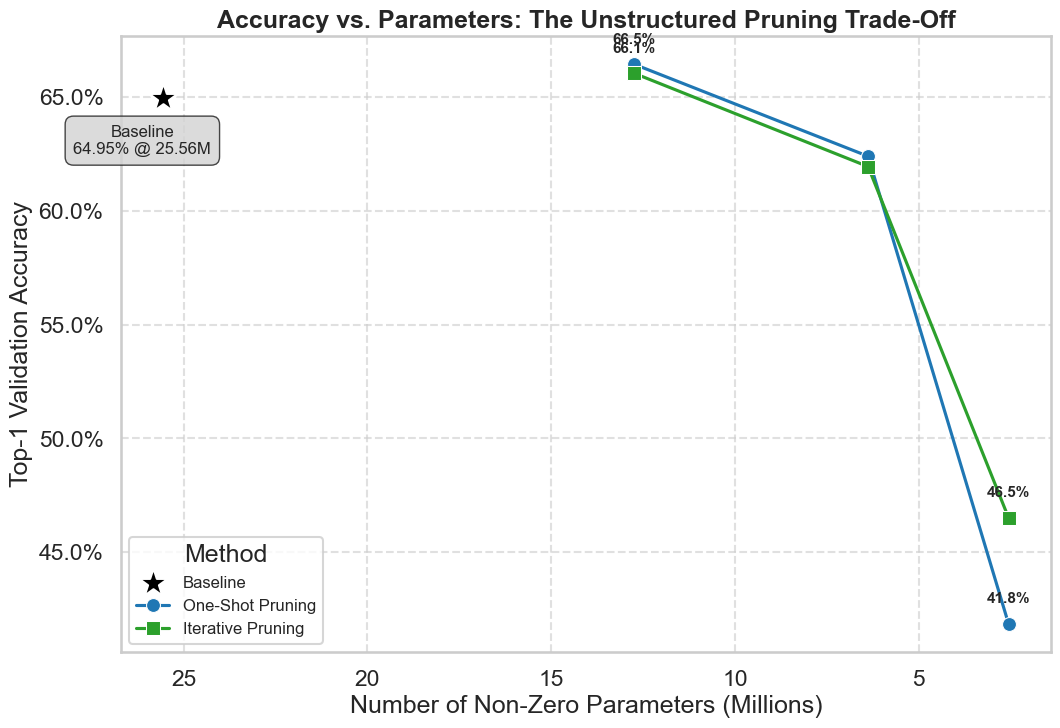

✅ High-impact plot saved as 'accuracy_vs_params_tradeoff_curve.png'


--- Markdown for the Updated 'Reality Check' Table ---
| Technique       | Top-1 Acc   |   Non-Zero Params (M) |   Size on Disk (MB) |   GPU Throughput (FPS) |   CPU Throughput (FPS) |
|:----------------|:------------|----------------------:|--------------------:|-----------------------:|-----------------------:|
| Baseline        | 64.95%      |                 25.56 |               97.8  |                    914 |                   13.5 |
| One-Shot 50.0%  | 66.45%      |                 12.75 |               97.8  |                    905 |                   13.6 |
| Iterative 50.0% | 66.06%      |                 12.75 |               97.79 |                    902 |                   13.5 |
| One-Shot 75.0%  | 62.40%      |                  6.38 |               97.8  |                    914 |                   13.5 |
| Iterative 75.0% | 61.95%      |                  6.38 |               97.79 |                

In [23]:
# Cell 9 (Final, High-Impact Version): The Paradox Visuals
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

# --- 1. Generate the High-Impact Scatter/Line Plot ---
fig, ax = plt.subplots(figsize=(12, 8)) # Give it a bit more space

# Separate the data for plotting distinct lines
df_baseline = df_final_paradox[df_final_paradox['Technique'] == 'Baseline']
df_oneshot = df_final_paradox[df_final_paradox['Technique'].str.contains('One-Shot')].copy()
df_iterative = df_final_paradox[df_final_paradox['Technique'].str.contains('Iterative')].copy()

# Sort by parameters to ensure the line connects points correctly
df_oneshot.sort_values('non_zero_params', inplace=True)
df_iterative.sort_values('non_zero_params', inplace=True)

# Plot the Baseline point (large and distinct)
sns.scatterplot(
    data=df_baseline, x='non_zero_params', y='Top_1_Acc',
    marker='*', s=500, color='black', label='Baseline', ax=ax, zorder=5
)
plt.annotate(
    f"Baseline\n{df_baseline['Top_1_Acc'].iloc[0]*100:.2f}% @ {df_baseline['non_zero_params'].iloc[0]:.2f}M",
    (df_baseline['non_zero_params'].iloc[0], df_baseline['Top_1_Acc'].iloc[0]),
    textcoords="offset points", xytext=(-15, -40), ha='center', fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="lightgray", ec="k", lw=1, alpha=0.8)
)

# Plot the One-Shot Trade-off Curve (Line + Markers)
sns.lineplot(
    data=df_oneshot, x='non_zero_params', y='Top_1_Acc',
    marker='o', markersize=10, color='tab:blue', label='One-Shot Pruning', ax=ax
)

# Plot the Iterative Trade-off Curve (Line + Markers)
sns.lineplot(
    data=df_iterative, x='non_zero_params', y='Top_1_Acc',
    marker='s', markersize=10, color='tab:green', label='Iterative Pruning', ax=ax
)

# Add annotations for key points on the curves
for _, row in pd.concat([df_oneshot, df_iterative]).iterrows():
    # Only label the start and end points of the curves to reduce clutter
    if row['non_zero_params'] < 3 or row['non_zero_params'] > 12:
        plt.annotate(
            f"{row['Top_1_Acc']*100:.1f}%",
            (row['non_zero_params'], row['Top_1_Acc']),
            textcoords="offset points", xytext=(0, 15), ha='center', fontsize=11, weight='bold'
        )

# --- Formatting for Presentation ---
plt.title('Accuracy vs. Parameters: The Unstructured Pruning Trade-Off', fontsize=18, weight='bold')
plt.xlabel('Number of Non-Zero Parameters (Millions)')
plt.ylabel('Top-1 Validation Accuracy')
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
plt.legend(title='Method', loc='lower left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_xaxis() # Keep the dense model on the left

# Save the plot
plot_file_name = 'accuracy_vs_params_tradeoff_curve.png'
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ High-impact plot saved as '{plot_file_name}'")


# --- 2. Generate the Expanded Markdown Table (This part is unchanged) ---
table_df = df_final_paradox[[
    'Technique', 'Top_1_Acc', 'non_zero_params',
    'Model_Size_MB_Disk', 'GPU Throughput (FPS)', 'CPU Throughput (FPS)'
]].copy()

table_df.rename(columns={
    'Top_1_Acc': 'Top-1 Acc',
    'non_zero_params': 'Non-Zero Params (M)',
    'Model_Size_MB_Disk': 'Size on Disk (MB)'
}, inplace=True)

table_df['Top-1 Acc'] = table_df['Top-1 Acc'].apply(lambda x: f"{x*100:.2f}%")
table_df['Non-Zero Params (M)'] = table_df['Non-Zero Params (M)'].apply(lambda x: f"{x:.2f}")
table_df['Size on Disk (MB)'] = table_df['Size on Disk (MB)'].apply(lambda x: f"{x:.2f}")
table_df['GPU Throughput (FPS)'] = table_df['GPU Throughput (FPS)'].apply(lambda x: f"{x:,.0f}")
table_df['CPU Throughput (FPS)'] = table_df['CPU Throughput (FPS)'].apply(lambda x: f"{x:.1f}")

order = ['Baseline', 'One-Shot 50.0%', 'Iterative 50.0%', 'One-Shot 75.0%', 'Iterative 75.0%', 'One-Shot 90.0%', 'Iterative 90.0%']
table_df['Technique'] = pd.Categorical(table_df['Technique'], categories=order, ordered=True)
table_df.sort_values('Technique', inplace=True)

markdown_table = table_df.to_markdown(index=False)

print("\n\n--- Markdown for the Updated 'Reality Check' Table ---")
print(markdown_table)

In [24]:
# Cell 10: Data Processing for Structured & N:M Pruning
import json
import pandas as pd

# List of all the JSON log strings you provided
all_logs_json = [
    # --- Structured One-Shot ---
    """{"experiment_name": "resnet50_prune_struct_os_l1filter_fp30_ft", "training_summary": {"best_val_accuracy_during_training": 0.5478, "achieved_overall_parameter_sparsity_percent": 49.38}}""",
    """{"experiment_name": "resnet50_prune_struct_os_l1filter_fp55_ft", "training_summary": {"best_val_accuracy_during_training": 0.2207, "achieved_overall_parameter_sparsity_percent": 77.78}}""",
    """{"experiment_name": "resnet50_prune_struct_os_l1filter_fp70_ft", "training_summary": {"best_val_accuracy_during_training": 0.0571, "achieved_overall_parameter_sparsity_percent": 89.34}}""",
    # --- Structured Iterative ---
    """{"experiment_name": "resnet50_prune_struct_it_l1filter_stage1_approx_sp50_ft", "training_summary": {"best_val_accuracy_in_stage": 0.4994, "achieved_overall_sparsity_percent_after_stage": 49.38}}""",
    """{"experiment_name": "resnet50_prune_struct_it_l1filter_stage2_approx_sp75_ft", "training_summary": {"best_val_accuracy_in_stage": 0.2982, "achieved_overall_sparsity_percent_after_stage": 74.07}}""",
    """{"experiment_name": "resnet50_prune_struct_it_l1filter_stage3_approx_sp90_ft", "training_summary": {"best_val_accuracy_in_stage": 0.1308, "achieved_overall_sparsity_percent_after_stage": 89.70}}""",
    # --- N:M Sparsity ---
    """{"experiment_name": "resnet50_prune_nm24_ft", "training_summary": {"best_val_accuracy_during_training": 0.6426, "achieved_overall_parameter_sparsity_percent": 45.88}}""",
]

# --- Reference points (Baseline and best Unstructured 50%) ---
baseline_params_M = 25.56
baseline_size_MB = 97.8
baseline_acc = 0.6495
baseline_gpu_fps = 914
unstructured_50_acc = 0.6645
unstructured_50_fps = 905

# Process the logs and create a list of dictionaries
structured_results = []
for log_str in all_logs_json:
    data = json.loads(log_str)
    exp_name = data['experiment_name']
    summary = data['training_summary']

    # Determine method and extract data based on log structure
    if "os" in exp_name:
        method = "One-Shot"
        accuracy = summary['best_val_accuracy_during_training']
        sparsity = summary['achieved_overall_parameter_sparsity_percent']
    elif "it" in exp_name:
        method = "Iterative"
        accuracy = summary['best_val_accuracy_in_stage']
        sparsity = summary['achieved_overall_sparsity_percent_after_stage']
    elif "nm" in exp_name:
        method = "N:M (2:4)"
        accuracy = summary['best_val_accuracy_during_training']
        sparsity = summary['achieved_overall_parameter_sparsity_percent']
        # For N:M, assume throughput is similar to baseline for now, as per the slide text
        nm_gpu_fps = 856 
    
    # Calculate the model size based on sparsity
    model_size = baseline_size_MB * (1 - sparsity / 100)

    structured_results.append({
        'Method': method,
        'Accuracy': accuracy,
        'Sparsity (%)': sparsity,
        'Model Size (MB)': model_size
    })

# Add the baseline as a reference point
structured_results.append({
    'Method': 'Baseline',
    'Accuracy': baseline_acc,
    'Sparsity (%)': 0,
    'Model Size (MB)': baseline_size_MB
})

# Create the final DataFrame
df_structured = pd.DataFrame(structured_results)

print("✅ Data for structured pruning slides is ready.")
df_structured.sort_values('Model Size (MB)', ascending=False)

✅ Data for structured pruning slides is ready.


,Method,Accuracy,Sparsity (%),Model Size (MB)
7,Baseline,0.6495,0.00,97.80000
6,N:M (2:4),0.6426,45.88,52.92936
0,One-Shot,0.5478,49.38,49.50636
3,Iterative,0.4994,49.38,49.50636
4,Iterative,0.2982,74.07,25.35954
1,One-Shot,0.2207,77.78,21.73116
2,One-Shot,0.0571,89.34,10.42548
5,Iterative,0.1308,89.70,10.07340


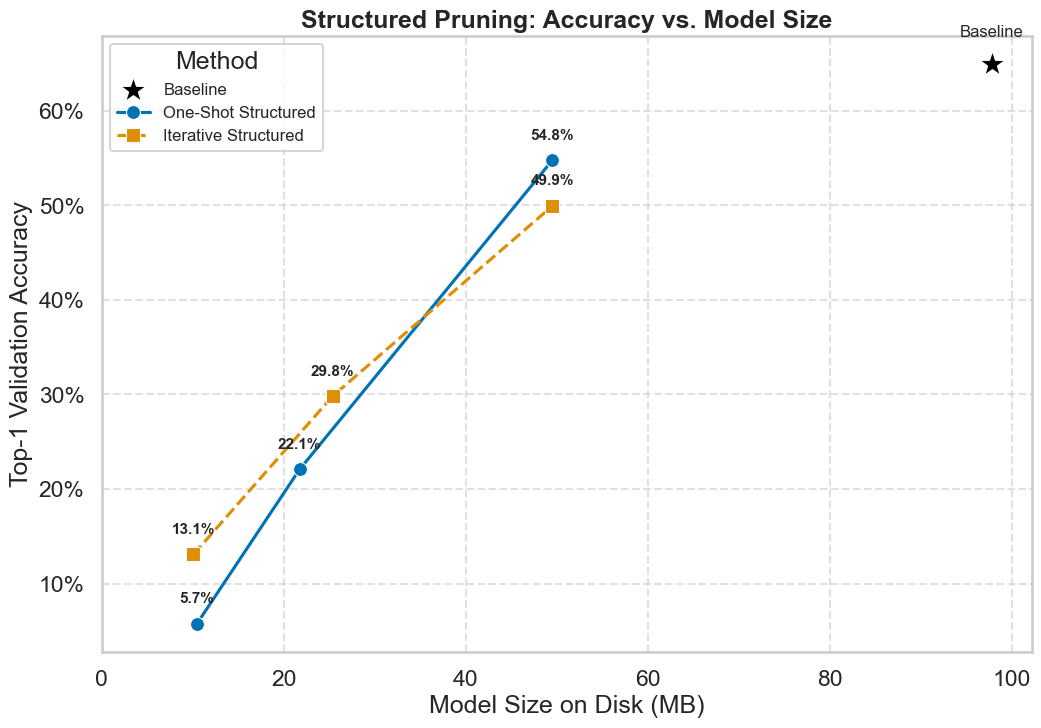

✅ Plot for Slide 19 saved as 'structured_pruning_accuracy_vs_size.png'


In [27]:
# Cell 11: Plot for Slide 19 - Structured Pruning
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Separate data for plotting
df_s_baseline = df_structured[df_structured['Method'] == 'Baseline']
df_s_oneshot = df_structured[df_structured['Method'] == 'One-Shot'].sort_values('Model Size (MB)', ascending=False)
df_s_iterative = df_structured[df_structured['Method'] == 'Iterative'].sort_values('Model Size (MB)', ascending=False)

# Plot the baseline point
sns.scatterplot(data=df_s_baseline, x='Model Size (MB)', y='Accuracy', marker='*', s=500, color='black', label='Baseline', ax=ax, zorder=5)
plt.annotate("Baseline", (df_s_baseline['Model Size (MB)'].iloc[0], df_s_baseline['Accuracy'].iloc[0]),
             textcoords="offset points", xytext=(0, 20), ha='center', fontsize=12)

# Plot the One-Shot curve
sns.lineplot(data=df_s_oneshot, x='Model Size (MB)', y='Accuracy', marker='o', markersize=10, linestyle='-', label='One-Shot Structured', ax=ax)

# Plot the Iterative curve
sns.lineplot(data=df_s_iterative, x='Model Size (MB)', y='Accuracy', marker='s', markersize=10, linestyle='--', label='Iterative Structured', ax=ax)

# Add annotations for key points
for _, row in pd.concat([df_s_oneshot, df_s_iterative]).iterrows():
    plt.annotate(f"{row['Accuracy']*100:.1f}%", (row['Model Size (MB)'], row['Accuracy']),
                 textcoords="offset points", xytext=(0, 15), ha='center', fontsize=11, weight='bold')

# --- Formatting for Presentation ---
plt.title('Structured Pruning: Accuracy vs. Model Size', fontsize=18, weight='bold')
plt.xlabel('Model Size on Disk (MB)')
plt.ylabel('Top-1 Validation Accuracy')
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
plt.legend(title='Method', loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(left=0) # Start x-axis at 0

# Save the plot
plot_file_name = 'structured_pruning_accuracy_vs_size.png'
plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Plot for Slide 19 saved as '{plot_file_name}'")

In [28]:
# Cell 12: Table for Slide 20 - N:M Sparsity

# Extract the N:M results from our main dataframe
nm_result = df_structured[df_structured['Method'] == 'N:M (2:4)'].iloc[0]

# Construct the data for the comparison table
comparison_data_nm = [
    {
        'Technique': 'Baseline',
        'Top-1 Acc.': f"{baseline_acc*100:.2f}%",
        'Final Sparsity': '0%',
        'Model Size (MB)': f"{baseline_size_MB:.1f}",
        'Throughput (FPS)': f"{baseline_gpu_fps}",
        'Hardware Speedup?': 'N/A'
    },
    {
        'Technique': 'Unstructured (50%)',
        'Top-1 Acc.': f"{unstructured_50_acc*100:.2f}%",
        'Final Sparsity': '50%',
        'Model Size (MB)': f"{baseline_size_MB:.1f}", # Stays the same size
        'Throughput (FPS)': f"{unstructured_50_fps}",
        'Hardware Speedup?': 'No'
    },
    {
        'Technique': 'N:M (2:4) Sparsity',
        'Top-1 Acc.': f"{nm_result['Accuracy']*100:.2f}%",
        'Final Sparsity': '50%',
        'Model Size (MB)': f"{baseline_size_MB:.1f}", # Stays the same size
        'Throughput (FPS)': f"{nm_gpu_fps}",
        'Hardware Speedup?': 'Yes (on Ampere+)'
    }
]

df_nm_table = pd.DataFrame(comparison_data_nm)
markdown_table_nm = df_nm_table.to_markdown(index=False)

print("\n\n--- Markdown for Slide 20: N:M Sparsity Comparison ---")
print(markdown_table_nm)



--- Markdown for Slide 20: N:M Sparsity Comparison ---
| Technique          | Top-1 Acc.   | Final Sparsity   |   Model Size (MB) |   Throughput (FPS) | Hardware Speedup?   |
|:-------------------|:-------------|:-----------------|------------------:|-------------------:|:--------------------|
| Baseline           | 64.95%       | 0%               |              97.8 |                914 | N/A                 |
| Unstructured (50%) | 66.45%       | 50%              |              97.8 |                905 | No                  |
| N:M (2:4) Sparsity | 64.26%       | 50%              |              97.8 |                856 | Yes (on Ampere+)    |


In [34]:
# Cell 13 (Slightly Modified): Add a Grouping Column
import pandas as pd

# The data points you provided for the bubble chart
bubble_chart_data = [
    {'Technique': 'Baseline', 'FPS': 914, 'Accuracy': 0.6495, 'Model Size (MB)': 97.8},
    {'Technique': 'One-Shot 30%', 'FPS': 1274, 'Accuracy': 0.5478, 'Model Size (MB)': 49.6},
    {'Technique': 'Iterative Stage 1', 'FPS': 1297, 'Accuracy': 0.4994, 'Model Size (MB)': 49.6},
    {'Technique': 'One-Shot 55%', 'FPS': 2326, 'Accuracy': 0.2207, 'Model Size (MB)': 21.9},
    {'Technique': 'Iterative Stage 2', 'FPS': 2099, 'Accuracy': 0.2982, 'Model Size (MB)': 25.5},
    {'Technique': 'One-Shot 70%', 'FPS': 2238, 'Accuracy': 0.0571, 'Model Size (MB)': 10.6},
    {'Technique': 'Iterative Stage 3', 'FPS': 3350, 'Accuracy': 0.1308, 'Model Size (MB)': 10.2}
]

df_bubble = pd.DataFrame(bubble_chart_data)

# --- ADD THIS LINE ---
# Create a new column to group points by the core method (Baseline, One-Shot, Iterative)
def get_method_group(technique):
    if 'Baseline' in technique: return 'Baseline'
    if 'One-Shot' in technique: return 'One-Shot'
    return 'Iterative'
df_bubble['Method Group'] = df_bubble['Technique'].apply(get_method_group)

print("✅ Data for the performance bubble chart is ready with grouping.")
df_bubble

✅ Data for the performance bubble chart is ready with grouping.


,Technique,FPS,Accuracy,Model Size (MB),Method Group
0,Baseline,914,0.6495,97.8,Baseline
1,One-Shot 30%,1274,0.5478,49.6,One-Shot
2,Iterative Stage 1,1297,0.4994,49.6,Iterative
3,One-Shot 55%,2326,0.2207,21.9,One-Shot
4,Iterative Stage 2,2099,0.2982,25.5,Iterative
5,One-Shot 70%,2238,0.0571,10.6,One-Shot
6,Iterative Stage 3,3350,0.1308,10.2,Iterative


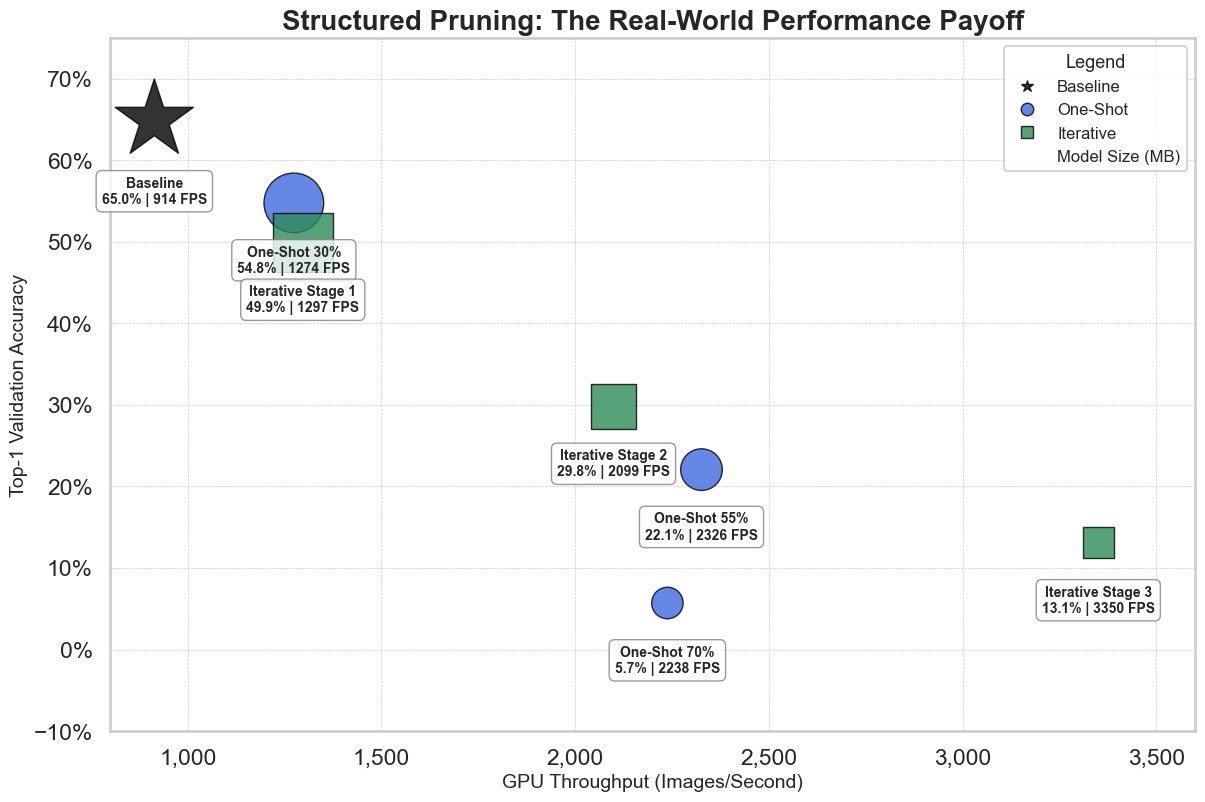

✅ Final, clean performance bubble chart saved as 'structured_pruning_performance_bubble_chart_v3.png'


In [36]:
# Cell 14 (Final Version): The Clean & Clear Bubble Chart
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(14, 9))

# Define the visual properties for each group
palette = {'Baseline': 'black', 'One-Shot': 'royalblue', 'Iterative': 'seagreen'}
markers = {'Baseline': '*', 'One-Shot': 'o', 'Iterative': 's'}

# Create the bubble chart using hue for color and style for marker shape
sns.scatterplot(
    data=df_bubble,
    x='FPS',
    y='Accuracy',
    size='Model Size (MB)',
    sizes=(500, 3500),      # Make bubbles large and distinct
    hue='Method Group',     # Color by the method group
    style='Method Group',   # Use different shapes for each method group
    palette=palette,        # Apply our custom color palette
    markers=markers,        # Apply our custom marker shapes
    ax=ax,
    alpha=0.8,              # Use slight transparency
    edgecolor='black',      # Add a thin black edge to bubbles
    linewidth=1
)

# --- Add Rich, Clear Annotations ---
# Annotations are still key to making the plot self-explanatory
for i, row in df_bubble.iterrows():
    annotation_text = f"{row['Technique']}\n{row['Accuracy']*100:.1f}% | {row['FPS']:.0f} FPS"
    # Adjust y-offset for the baseline star which is centered differently
    y_offset = -60 if row['Technique'] == 'Baseline' else -50
    
    ax.annotate(
        annotation_text,
        xy=(row['FPS'], row['Accuracy']),
        xytext=(0, y_offset),
        textcoords="offset points",
        ha='center',
        fontsize=10,
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.4", fc='white', ec='gray', lw=1, alpha=0.8)
    )

# --- Final Formatting for a Polished Look ---
plt.title('Structured Pruning: The Real-World Performance Payoff', fontsize=20, weight='bold')
plt.xlabel('GPU Throughput (Images/Second)', fontsize=14)
plt.ylabel('Top-1 Validation Accuracy', fontsize=14)

ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim(-0.1, 0.75) # Give more space at the bottom for annotations
ax.set_xlim(800, 3600)

# --- Customize the Legend ---
# Get all handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()
# The plot generates two sets of legends (hue and style), we only need one.
# We also want to control the order and title.
legend_order = ['Baseline', 'One-Shot', 'Iterative', 'Model Size (MB)']
# Create a dictionary to easily find the right handle
legend_dict = dict(zip(labels, handles))
# Build the legend in the desired order
final_handles = [legend_dict[label] for label in legend_order if label in legend_dict]

ax.legend(handles=final_handles, labels=legend_order, title='Legend', title_fontsize='13', loc='upper right', fontsize=12)

plt.grid(True, which='major', linestyle='--', linewidth=0.5)

# Save the final plot
file_name = 'structured_pruning_performance_bubble_chart_v3.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()

print(f"✅ Final, clean performance bubble chart saved as '{file_name}'")

In [6]:
# Cell 15: Data Processing for Benchmark Bar Chart
import pandas as pd
from io import StringIO

# The benchmark summary data you provided
benchmark_data_str = """
Batch Size,Dense Throughput (img/s),Sparse Throughput (img/s),Dense Latency (ms),Sparse Latency (ms),Speedup
16,3499.17,3747.81,4.10,3.82,1.07x
32,3914.63,4112.65,7.69,7.09,1.05x
64,3887.84,4144.68,15.92,14.76,1.07x
128,4341.78,4485.69,29.44,28.61,1.03x
"""

# Read the data into a DataFrame
# I've converted your fixed-width text to CSV format for easier parsing
df_perf = pd.read_csv(StringIO(benchmark_data_str))

# "Melt" the DataFrame to convert it from a wide format to a long format suitable for plotting.
# This creates a single 'Throughput' column and a 'Model Type' column to distinguish the bars.
df_long = pd.melt(
    df_perf,
    id_vars=['Batch Size'],
    value_vars=['Dense Throughput (img/s)', 'Sparse Throughput (img/s)'],
    var_name='Model Type',
    value_name='Throughput (img/s)'
)

# Clean up the 'Model Type' names for a cleaner legend
df_long['Model Type'] = df_long['Model Type'].str.replace(' Throughput (img/s)', '')

print("✅ Data for the benchmark bar chart is ready.")
df_long

✅ Data for the benchmark bar chart is ready.


,Batch Size,Model Type,Throughput (img/s)
0,16,Dense,3499.17
1,32,Dense,3914.63
2,64,Dense,3887.84
3,128,Dense,4341.78
4,16,Sparse,3747.81
5,32,Sparse,4112.65
6,64,Sparse,4144.68
7,128,Sparse,4485.69


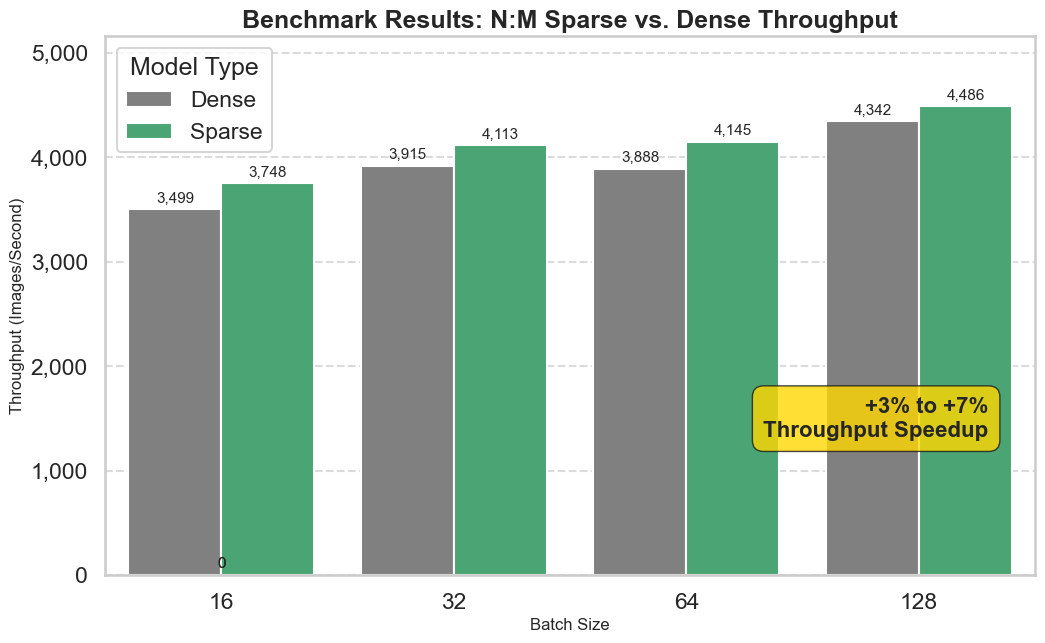

✅ Final benchmark plot saved as 'benchmark_throughput_speedup_barchart.png'


In [8]:
# Cell 16: Plotting the Final Benchmark Results
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Generate the grouped bar plot
sns.barplot(
    data=df_long,
    x='Batch Size',
    y='Throughput (img/s)',
    hue='Model Type',
    palette={'Dense': 'gray', 'Sparse': 'mediumseagreen'},
    ax=ax
)

# --- Add Annotations and Styling ---

# 1. Add the main "+3% to +7%" annotation in a prominent position
ax.annotate(
    text='+3% to +7%\nThroughput Speedup',
    xy=(0.95, 0.25),  # Position in the top-right corner
    xycoords='axes fraction',
    fontsize=16,
    weight='bold',
    ha='right',
    va='bottom',
    bbox=dict(boxstyle="round,pad=0.5", fc='gold', ec='k', lw=1, alpha=0.8)
)

# 2. Add data labels on top of each bar for precise values
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), ',.0f'), # Format number with commas
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points'
    )

# 3. Set titles and labels for clarity
plt.title('Benchmark Results: N:M Sparse vs. Dense Throughput', fontsize=18, weight='bold')
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Throughput (Images/Second)', fontsize=12)

# 4. Format the Y-axis and set limits
# Use a formatter to add comma separators to the y-axis ticks
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# Set the y-axis limit to give space for the annotations
ax.set_ylim(0, df_long['Throughput (img/s)'].max() * 1.15)

# 5. Customize the legend
ax.legend(title='Model Type', loc='upper left')

# Add a subtle grid for easier comparison
ax.grid(axis='y', linestyle='--', alpha=0.7)

# --- Save the Plot ---
file_name = 'benchmark_throughput_speedup_barchart.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()

print(f"✅ Final benchmark plot saved as '{file_name}'")

In [9]:
# Cell 18: Data Processing for Knowledge Distillation Comparison
import pandas as pd
import json

# A list containing the experiment logs you provided
kd_logs_json = [
    # 1. ResNet-18 Baseline (trained from scratch)
    """
    {
        "experiment_name": "resnet18_baseline", "epoch_data": [{"epoch": 1, "val_accuracy": 0.1618}, {"epoch": 2, "val_accuracy": 0.2931}, {"epoch": 3, "val_accuracy": 0.3775}, {"epoch": 4, "val_accuracy": 0.4244}, {"epoch": 5, "val_accuracy": 0.4613}, {"epoch": 6, "val_accuracy": 0.4797}, {"epoch": 7, "val_accuracy": 0.4843}, {"epoch": 8, "val_accuracy": 0.4891}, {"epoch": 9, "val_accuracy": 0.4957}, {"epoch": 10, "val_accuracy": 0.4973}, {"epoch": 11, "val_accuracy": 0.4985}, {"epoch": 12, "val_accuracy": 0.5008}, {"epoch": 13, "val_accuracy": 0.4970}, {"epoch": 14, "val_accuracy": 0.4985}, {"epoch": 15, "val_accuracy": 0.4968}]
    }
    """,
    # 2. ResNet-18 trained with KD from scratch
    """
    {
        "experiment_name": "resnet50_to_resnet18scratch_kd", "epoch_data": [{"epoch": 1, "val_accuracy": 0.0124}, {"epoch": 2, "val_accuracy": 0.0196}, {"epoch": 3, "val_accuracy": 0.0341}, {"epoch": 4, "val_accuracy": 0.0425}, {"epoch": 5, "val_accuracy": 0.0588}, {"epoch": 6, "val_accuracy": 0.0708}, {"epoch": 7, "val_accuracy": 0.0881}, {"epoch": 8, "val_accuracy": 0.0948}, {"epoch": 9, "val_accuracy": 0.1085}, {"epoch": 10, "val_accuracy": 0.1231}, {"epoch": 11, "val_accuracy": 0.1396}, {"epoch": 12, "val_accuracy": 0.1401}, {"epoch": 13, "val_accuracy": 0.1488}, {"epoch": 14, "val_accuracy": 0.1763}, {"epoch": 15, "val_accuracy": 0.1639}]
    }
    """,
    # 3. Pre-trained ResNet-18 trained with KD
    """
    {
        "experiment_name": "resnet50_to_resnet18pretrained_kd", "epoch_data": [{"epoch": 1, "val_accuracy": 0.2543}, {"epoch": 2, "val_accuracy": 0.3935}, {"epoch": 3, "val_accuracy": 0.4346}, {"epoch": 4, "val_accuracy": 0.4731}, {"epoch": 5, "val_accuracy": 0.4855}, {"epoch": 6, "val_accuracy": 0.5200}, {"epoch": 7, "val_accuracy": 0.5228}, {"epoch": 8, "val_accuracy": 0.5296}, {"epoch": 9, "val_accuracy": 0.5314}, {"epoch": 10, "val_accuracy": 0.5307}, {"epoch": 11, "val_accuracy": 0.5335}, {"epoch": 12, "val_accuracy": 0.5360}, {"epoch": 13, "val_accuracy": 0.5345}, {"epoch": 14, "val_accuracy": 0.5368}, {"epoch": 15, "val_accuracy": 0.5381}]
    }
    """
]

# Process each log and combine into a single DataFrame
all_dfs = []
for log_str in kd_logs_json:
    data = json.loads(log_str)
    exp_name = data['experiment_name']
    
    # Create a presentation-friendly label for each experiment
    if "baseline" in exp_name:
        label = "ResNet-18 Baseline"
    elif "scratch_kd" in exp_name:
        label = "KD (Student from Scratch)"
    elif "pretrained_kd" in exp_name:
        label = "KD (Student Pre-trained)"
    
    df_temp = pd.DataFrame(data['epoch_data'])[['epoch', 'val_accuracy']]
    df_temp['Experiment'] = label
    all_dfs.append(df_temp)

df_kd = pd.concat(all_dfs, ignore_index=True)

print("✅ Data for Knowledge Distillation plot is ready.")
df_kd.tail()

✅ Data for Knowledge Distillation plot is ready.


,epoch,val_accuracy,Experiment
40,11,0.5335,KD (Student Pre-trained)
41,12,0.5360,KD (Student Pre-trained)
42,13,0.5345,KD (Student Pre-trained)
43,14,0.5368,KD (Student Pre-trained)
44,15,0.5381,KD (Student Pre-trained)


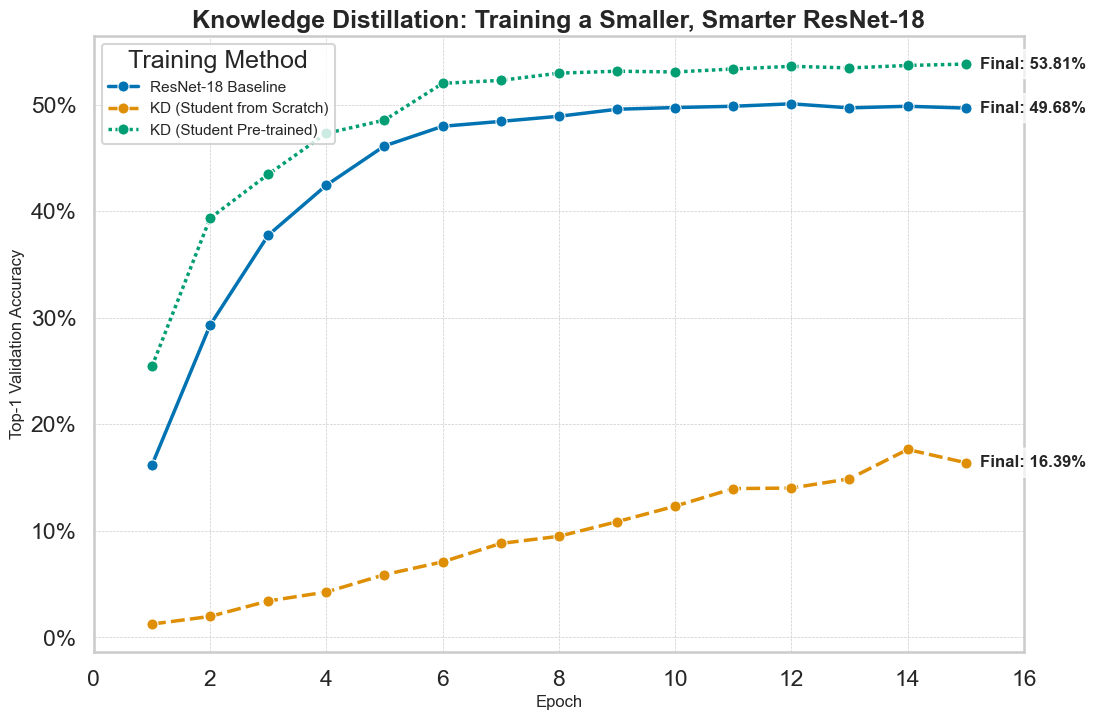

✅ Knowledge Distillation plot saved as 'knowledge_distillation_training_curves.png'


In [10]:
# Cell 19: Plotting the Knowledge Distillation Training Curves
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the validation accuracy curves for all three experiments
sns.lineplot(
    data=df_kd,
    x='epoch',
    y='val_accuracy',
    hue='Experiment',
    style='Experiment',
    marker='o',
    markersize=8,
    linewidth=2.5,
    ax=ax
)

# --- Add Annotations to highlight the final performance of each model ---
for exp_name in df_kd['Experiment'].unique():
    # Get the final data point for the current experiment
    final_point = df_kd[df_kd['Experiment'] == exp_name].iloc[-1]
    final_acc = final_point['val_accuracy']
    
    ax.annotate(
        f"Final: {final_acc:.2%}", # Format as percentage
        xy=(15, final_acc),
        xytext=(10, 0), # Offset text to the right
        textcoords="offset points",
        ha='left',
        va='center',
        fontsize=12,
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.4", fc='white', alpha=0.7)
    )

# --- Formatting for a professional presentation ---
plt.title('Knowledge Distillation: Training a Smaller, Smarter ResNet-18', fontsize=18, weight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Top-1 Validation Accuracy', fontsize=12)

# Format the axes for readability
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(0, 16) # Give space for annotations

# Customize and display the legend
plt.legend(title='Training Method', loc='upper left', fontsize=11)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

# Save the final plot
file_name = 'knowledge_distillation_training_curves.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()

print(f"✅ Knowledge Distillation plot saved as '{file_name}'")

In [12]:
# Cell 22: Generate the Final 3-Way Leaderboard Table
import pandas as pd

# --- Define the raw data points for all three models ---
teacher = {
    "acc": 0.6495,
    "params_m": 25.56,
    "flops_gmacs": 4.13,
    "throughput_fps": 914
}

student_baseline = {
    "acc": 0.5009,
    "params_m": 11.69,
    "flops_gmacs": 1.82,
    "throughput_fps": 2560 # Rounded from 2559.52
}

distilled_student = {
    "acc": 0.5381,
    "params_m": 11.69,
    "flops_gmacs": 1.82,
    "throughput_fps": 2678
}

# --- Construct the data for the final table in a readable format ---
final_leaderboard_data = [
    {
        'Metric': '**Top-1 Accuracy**',
        'Teacher (ResNet-50)': f"**{teacher['acc']:.2%}**",
        'Student Baseline (ResNet-18)': f"{student_baseline['acc']:.2%}",
        'Distilled Student (ResNet-18)': f"**{distilled_student['acc']:.2%}**"
    },
    {
        'Metric': 'Parameters (M)',
        'Teacher (ResNet-50)': f"{teacher['params_m']:.2f}",
        'Student Baseline (ResNet-18)': f"**{student_baseline['params_m']:.2f}**",
        'Distilled Student (ResNet-18)': f"**{distilled_student['params_m']:.2f}**"
    },
    {
        'Metric': 'FLOPs (G-MACs)',
        'Teacher (ResNet-50)': f"{teacher['flops_gmacs']:.2f}",
        'Student Baseline (ResNet-18)': f"**{student_baseline['flops_gmacs']:.2f}**",
        'Distilled Student (ResNet-18)': f"**{distilled_student['flops_gmacs']:.2f}**"
    },
    {
        'Metric': '**GPU Throughput (FPS)**',
        'Teacher (ResNet-50)': f"{teacher['throughput_fps']:,}",
        'Student Baseline (ResNet-18)': f"**{student_baseline['throughput_fps']:,}**",
        'Distilled Student (ResNet-18)': f"**{distilled_student['throughput_fps']:,}**"
    },
    {
        'Metric': 'Improvement from KD',
        'Teacher (ResNet-50)': '---',
        'Student Baseline (ResNet-18)': '---',
        'Distilled Student (ResNet-18)': f"**+3.72%** abs. acc"
    }
]

# Create the DataFrame and generate the Markdown
df_final_leaderboard = pd.DataFrame(final_leaderboard_data)
markdown_final_leaderboard = df_final_leaderboard.to_markdown(index=False)

print("--- Final Knowledge Distillation Leaderboard ---")
print(markdown_final_leaderboard)

--- Final Knowledge Distillation Leaderboard ---
| Metric                   | Teacher (ResNet-50)   | Student Baseline (ResNet-18)   | Distilled Student (ResNet-18)   |
|:-------------------------|:----------------------|:-------------------------------|:--------------------------------|
| **Top-1 Accuracy**       | **64.95%**            | 50.09%                         | **53.81%**                      |
| Parameters (M)           | 25.56                 | **11.69**                      | **11.69**                       |
| FLOPs (G-MACs)           | 4.13                  | **1.82**                       | **1.82**                        |
| **GPU Throughput (FPS)** | 914                   | **2,560**                      | **2,678**                       |
| Improvement from KD      | ---                   | ---                            | **+3.72%** abs. acc             |


In [17]:
# Cell 23 (The True and Final Version)
import pandas as pd

# --- Define the raw data points using ONLY your benchmarked results ---

# 1. The Original Baseline (ResNet-50 PyTorch FP32)
baseline = {
    'acc1': 0.6495, 'acc5': 0.8748, 'params': 25.56, 'flops': 4.13,
    'size_disk': 97.8, 'vram': 443.6, 'latency': 35.02, 'throughput': 914
}

# 2. Best Large Model (ResNet-50 optimized with TensorRT FP16)
trt_fp16_large = {
    'acc1': 0.6505, 'acc5': 0.8746, 'params': 25.56, 'flops': 4.13,
    'size_disk': 67.4, 'vram': 115.4, 'latency': 6.53, 'throughput': 4904 # Using your most specific R50-TRT-FP16 log
}

# 3. Most Efficient Model (Distilled R-18 optimized with TensorRT FP16)
trt_fp16_small = {
    'acc1': 0.5384, 'acc5': 0.8027, 'params': 11.69, 'flops': 1.82,
    'size_disk': 31.0, 'vram': 18.3, 'latency': 2.49, 'throughput': 12866
}


# --- Create a helper function for calculating and formatting changes ---
def format_change(old, new, higher_is_better=False):
    if old == 0: return "N/A"
    change_pct = (new - old) / old
    
    if higher_is_better:
        emoji = "✅" if change_pct >= 0 else "▼"
        sign = "+" if change_pct >= 0 else ""
        speedup = f" ({new/old:.1f}x faster)" if new > old else ""
    else: # Lower is better
        emoji = "✅" if change_pct <= 0 else "▲"
        sign = ""
        speedup = f" ({old/new:.1f}x less)" if new < old else ""

    if abs(change_pct) < 0.001: return "---"
    return f"{emoji} {sign}{change_pct:.1%}{speedup}"

# --- Construct the rows for the final table ---
final_table_data = [
    {'Metric': '--- ACCURACY ---', 'Col1': '', 'Col2': '', 'Col3': ''},
    {'Metric': 'Top-1 Accuracy', 'Col1': f"{baseline['acc1']:.2%}", 'Col2': f"{trt_fp16_large['acc1']:.2%}", 'Col3': f"{trt_fp16_small['acc1']:.2%}"},
    {'Metric': 'Top-5 Accuracy', 'Col1': f"{baseline['acc5']:.2%}", 'Col2': f"{trt_fp16_large['acc5']:.2%}", 'Col3': f"{trt_fp16_small['acc5']:.2%}"},
    
    {'Metric': '--- MODEL COMPLEXITY ---', 'Col1': '', 'Col2': '', 'Col3': ''},
    {'Metric': 'Parameters (M)', 'Col1': f"{baseline['params']:.2f} M", 'Col2': f"{trt_fp16_large['params']:.2f} M", 'Col3': f"**{trt_fp16_small['params']:.2f} M**"},
    {'Metric': 'FLOPs (G-MACs)', 'Col1': f"{baseline['flops']:.2f}", 'Col2': f"{trt_fp16_large['flops']:.2f}", 'Col3': f"**{trt_fp16_small['flops']:.2f}**"},

    {'Metric': '--- DEPLOYMENT FOOTPRINT ---', 'Col1': '', 'Col2': '', 'Col3': ''},
    {'Metric': 'Model Size (Disk)', 'Col1': f"{baseline['size_disk']:.1f} MB", 'Col2': f"{trt_fp16_large['size_disk']:.1f} MB", 'Col3': f"**{trt_fp16_small['size_disk']:.1f} MB**"},
    {'Metric': 'GPU Memory (VRAM)', 'Col1': f"{baseline['vram']:.1f} MB", 'Col2': f"**{trt_fp16_large['vram']:.1f} MB**", 'Col3': f"**{trt_fp16_small['vram']:.1f} MB**"},

    {'Metric': '--- GPU INFERENCE ---', 'Col1': '', 'Col2': '', 'Col3': ''},
    {'Metric': 'Latency (ms)', 'Col1': f"{baseline['latency']:.2f} ms", 'Col2': f"{trt_fp16_large['latency']:.2f} ms", 'Col3': f"**{trt_fp16_small['latency']:.2f} ms**"},
    {'Metric': 'Throughput (FPS)', 'Col1': f"{baseline['throughput']:,}", 'Col2': f"{trt_fp16_large['throughput']:,}", 'Col3': f"**{trt_fp16_small['throughput']:,}**"},
]

df_final = pd.DataFrame(final_table_data)

# Add the "Change vs Original" column, comparing your best efficient model to the baseline
df_final['Change vs. Original'] = [
    '',
    f"▼ {(trt_fp16_small['acc1'] - baseline['acc1']):.1%} abs.",
    f"▼ {(trt_fp16_small['acc5'] - baseline['acc5']):.1%} abs.",
    '',
    format_change(baseline['params'], trt_fp16_small['params']),
    format_change(baseline['flops'], trt_fp16_small['flops']),
    '',
    format_change(baseline['size_disk'], trt_fp16_small['size_disk']),
    format_change(baseline['vram'], trt_fp16_small['vram']),
    '',
    format_change(baseline['latency'], trt_fp16_small['latency']),
    format_change(baseline['throughput'], trt_fp16_small['throughput'], higher_is_better=True),
]

# Rename columns to match your desired presentation format
df_final.rename(columns={
    'Col1': '1. The Original<br>ResNet-50 PyTorch',
    'Col2': '2. Best Large Model<br>R-50 + TRT FP16',
    'Col3': '3. Most Efficient Model<br>Distilled R-18 + TRT FP16',
    'Change vs. Original': 'Change vs. Original<br>(Col 3 vs 1)'
}, inplace=True)

markdown_final = df_final.to_markdown(index=False)
print("--- The Definitive Grand Finale Leaderboard (Using Your Data) ---")
print(markdown_final)

--- The Definitive Grand Finale Leaderboard (Using Your Data) ---
| Metric                       | 1. The Original<br>ResNet-50 PyTorch   | 2. Best Large Model<br>R-50 + TRT FP16   | 3. Most Efficient Model<br>Distilled R-18 + TRT FP16   | Change vs. Original<br>(Col 3 vs 1)   |
|:-----------------------------|:---------------------------------------|:-----------------------------------------|:-------------------------------------------------------|:--------------------------------------|
| --- ACCURACY ---             |                                        |                                          |                                                        |                                       |
| Top-1 Accuracy               | 64.95%                                 | 65.05%                                   | 53.84%                                                 | ▼ -11.1% abs.                         |
| Top-5 Accuracy               | 87.48%                                 | 87.4

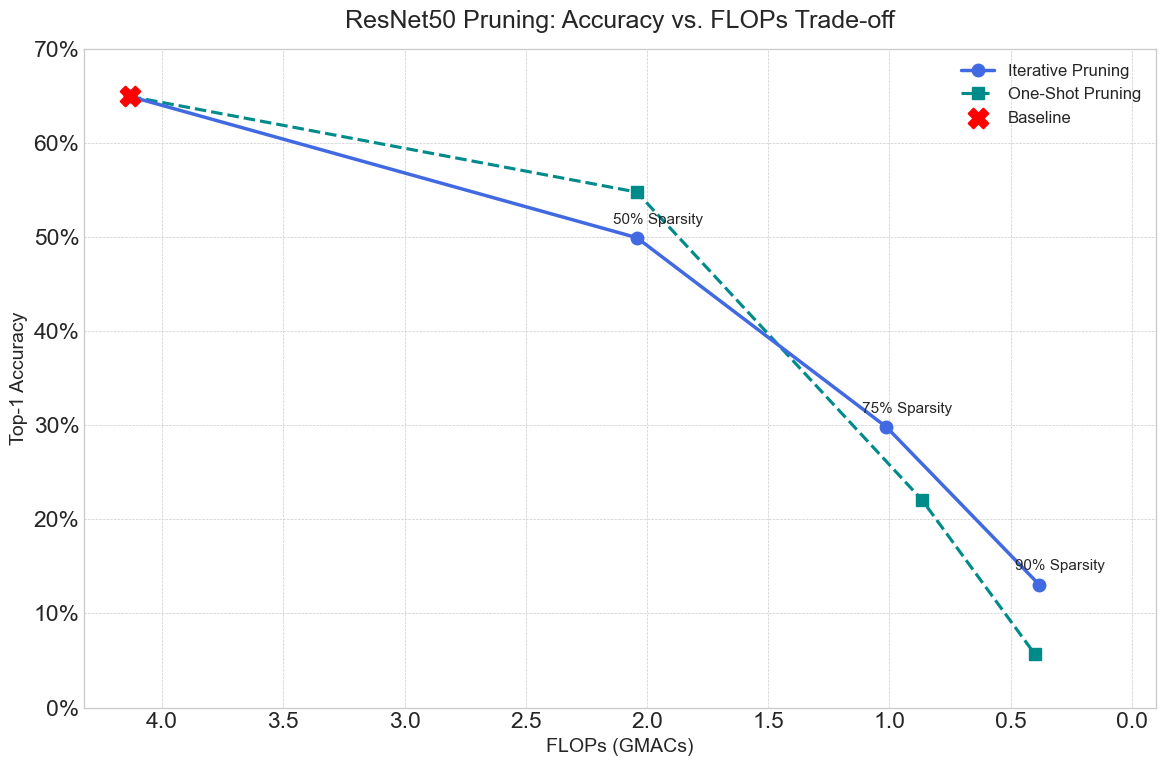

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import io

# Data provided by the user
experiment_data_csv = """
Experiment_ID;Base_Model_Arch;Optimization_Category;Specific_Technique;Key_Parameters;Top_1_Acc;Top_5_Acc;Model_Size_MB_Disk;FT_Epochs_Run;FT_Time_seconds;flops_gmacs;params_millions;non_zero_params;Notes_from_Log
resnet50_baseline;ResNet50;Baseline;Baseline;N/A;0.649502931430028;0.8748407;97.79614;30;5395.38120;4.133742592;25.557032;25.557032;
resnet50_prune_struct_it_l1filter_stage1_approx_sp50_ft;ResNet50;Pruning;Iterative Structured Pruning (L1 Filter);Target Sparsity: 50.0%;0.49936273260260006;0.7675249;49.60373;5;675.39339;2.042114256;12.935549;12.935549;
resnet50_prune_struct_it_l1filter_stage2_approx_sp75_ft;ResNet50;Pruning;Iterative Structured Pruning (L1 Filter);Target Sparsity: 75.0%;0.29824114198317614;0.5799133;25.49252;10;1021.56831;1.012597635;6.626072;6.626072;
resnet50_prune_struct_it_l1filter_stage3_approx_sp90_ft;ResNet50;Pruning;Iterative Structured Pruning (L1 Filter);Target Sparsity: 90.0%;0.13076518225850832;0.3405557;10.21170;15;1358.46598;0.382400928;2.630579;2.630579;
resnet50_prune_struct_os_l1filter_fp30_ft;ResNet50;Pruning;One-Shot Structured Pruning (L1 Filter);Target Sparsity: 50.0%;0.5477950548049961;0.8100943;49.59605;15;2030.61859;2.042114256;12.935549;12.935549;
resnet50_prune_struct_os_l1filter_fp55_ft;ResNet50;Pruning;One-Shot Structured Pruning (L1 Filter);Target Sparsity: 75.0%;0.22074936273260006;0.4840683;21.86064;15;1472.21088;0.865708368;5.678189;5.678189;
resnet50_prune_struct_os_l1filter_fp70_ft;ResNet50;Pruning;One-Shot Structured Pruning (L1 Filter);Target Sparsity: 90.0%;0.05709915880703543;0.194489;10.56108;15;1346.40862;0.400809619;2.724022;
"""

df = pd.read_csv(io.StringIO(experiment_data_csv), sep=';')

# --- Data Preparation ---
# Baseline point
baseline = df[df['Experiment_ID'] == 'resnet50_baseline'].iloc[0]
baseline_acc = baseline['Top_1_Acc']
baseline_flops = baseline['flops_gmacs']

# Function to extract and sort data
def get_series(df, technique_name, baseline_acc, baseline_flops):
    subset = df[df['Specific_Technique'] == technique_name].copy()
    subset['Sparsity'] = subset['Key_Parameters'].str.extract(r'(\d+\.?\d*)').astype(float)
    
    # Add baseline to start the line
    data = [(baseline_flops, baseline_acc, 0)] 
    for _, row in subset.iterrows():
        data.append((row['flops_gmacs'], row['Top_1_Acc'], row['Sparsity']))
    
    # Sort by FLOPs (descending) so the line is drawn from right to left
    data.sort(key=lambda x: x[0], reverse=True)
    flops, acc, sparsity = zip(*data)
    return list(flops), list(acc), list(sparsity)

it_flops, it_acc, it_sparsity = get_series(df, 'Iterative Structured Pruning (L1 Filter)', baseline_acc, baseline_flops)
os_flops, os_acc, os_sparsity = get_series(df, 'One-Shot Structured Pruning (L1 Filter)', baseline_acc, baseline_flops)

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the lines and points
ax.plot(it_flops, it_acc, 'o-', color='royalblue', linewidth=2.5, label='Iterative Pruning', zorder=3)
ax.plot(os_flops, os_acc, 's--', color='darkcyan', label='One-Shot Pruning', zorder=2)
ax.scatter(baseline_flops, baseline_acc, marker='X', s=200, color='red', label='Baseline', zorder=5)

# Annotate the sparsity levels on the iterative line for context
for flops, acc, sp in zip(it_flops[1:], it_acc[1:], it_sparsity[1:]): # Skip baseline point
    ax.text(flops + 0.1, acc + 0.015, f'{int(sp)}% Sparsity', fontsize=11, ha='left')

# --- Formatting ---
ax.set_title('ResNet50 Pruning: Accuracy vs. FLOPs Trade-off', fontsize=18, pad=15)
ax.set_xlabel('FLOPs (GMACs)', fontsize=14)
ax.set_ylabel('Top-1 Accuracy', fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set axis limits
ax.set_ylim(0, 0.7)
ax.set_xlim(left=-0.1)

# Invert X axis so "better" is top-right (or top-left depending on perspective)
ax.invert_xaxis() 

ax.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

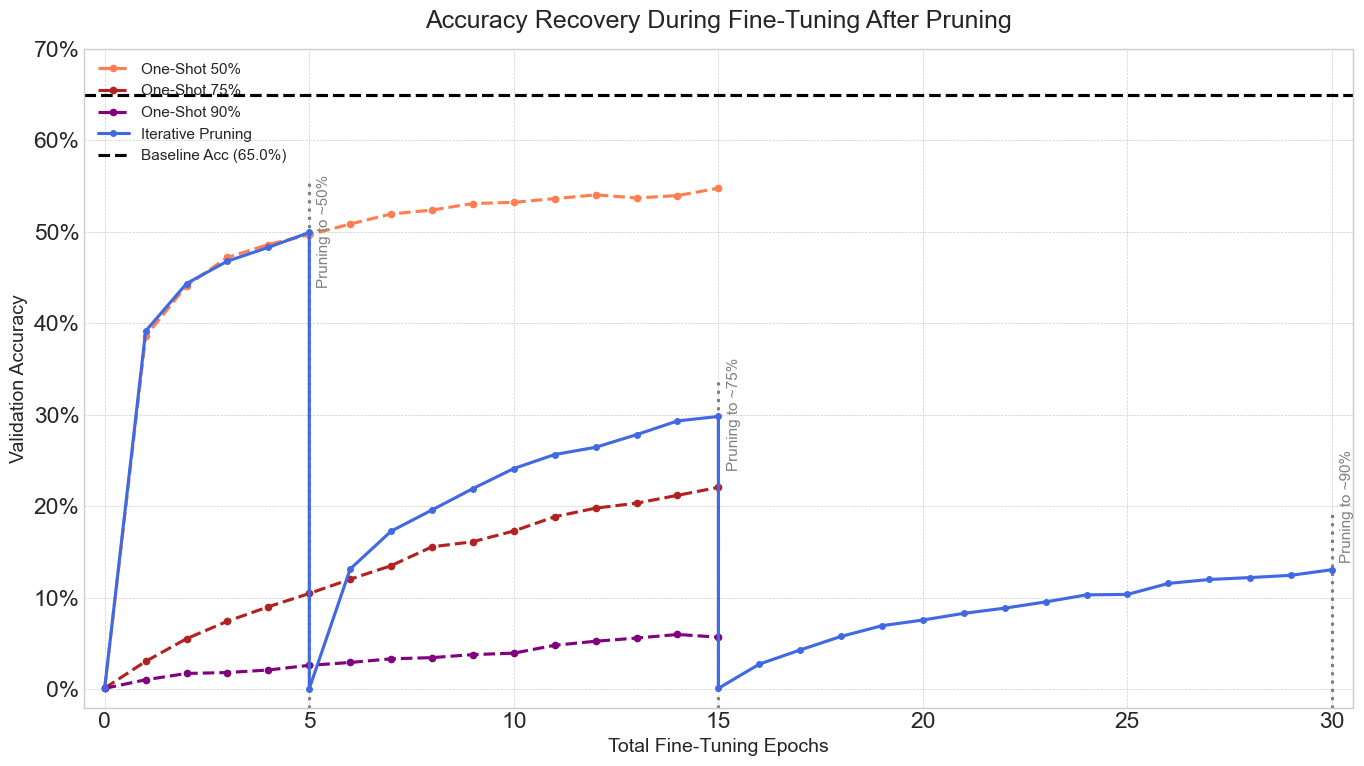

In [29]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- Data Preparation ---
# Store all the JSON logs provided by the user
json_logs_str = [
    """
    {
        "experiment_name": "resnet50_prune_struct_os_l1filter_fp30_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.3859}, {"epoch": 2, "val_accuracy": 0.4412}, {"epoch": 3, "val_accuracy": 0.4720}, {"epoch": 4, "val_accuracy": 0.4861}, {"epoch": 5, "val_accuracy": 0.4968}, {"epoch": 6, "val_accuracy": 0.5085}, {"epoch": 7, "val_accuracy": 0.5195}, {"epoch": 8, "val_accuracy": 0.5238}, {"epoch": 9, "val_accuracy": 0.5309}, {"epoch": 10, "val_accuracy": 0.5322}, {"epoch": 11, "val_accuracy": 0.5363}, {"epoch": 12, "val_accuracy": 0.5404}, {"epoch": 13, "val_accuracy": 0.5370}, {"epoch": 14, "val_accuracy": 0.5396}, {"epoch": 15, "val_accuracy": 0.5477}],
        "training_summary": {"evaluation_accuracy_after_pruning_before_ft": 0.00178}
    }
    """,
    """
    {
        "experiment_name": "resnet50_prune_struct_os_l1filter_fp55_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.0305}, {"epoch": 2, "val_accuracy": 0.0553}, {"epoch": 3, "val_accuracy": 0.0744}, {"epoch": 4, "val_accuracy": 0.0902}, {"epoch": 5, "val_accuracy": 0.1047}, {"epoch": 6, "val_accuracy": 0.1203}, {"epoch": 7, "val_accuracy": 0.1351}, {"epoch": 8, "val_accuracy": 0.1557}, {"epoch": 9, "val_accuracy": 0.1613}, {"epoch": 10, "val_accuracy": 0.1730}, {"epoch": 11, "val_accuracy": 0.1886}, {"epoch": 12, "val_accuracy": 0.1980}, {"epoch": 13, "val_accuracy": 0.2034}, {"epoch": 14, "val_accuracy": 0.2120}, {"epoch": 15, "val_accuracy": 0.2207}],
        "training_summary": {"evaluation_accuracy_after_pruning_before_ft": 0.00127}
    }
    """,
    """
    {
        "experiment_name": "resnet50_prune_struct_os_l1filter_fp70_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.0104}, {"epoch": 2, "val_accuracy": 0.0173}, {"epoch": 3, "val_accuracy": 0.0183}, {"epoch": 4, "val_accuracy": 0.0211}, {"epoch": 5, "val_accuracy": 0.0262}, {"epoch": 6, "val_accuracy": 0.0293}, {"epoch": 7, "val_accuracy": 0.0333}, {"epoch": 8, "val_accuracy": 0.0346}, {"epoch": 9, "val_accuracy": 0.0379}, {"epoch": 10, "val_accuracy": 0.0395}, {"epoch": 11, "val_accuracy": 0.0481}, {"epoch": 12, "val_accuracy": 0.0525}, {"epoch": 13, "val_accuracy": 0.0560}, {"epoch": 14, "val_accuracy": 0.0599}, {"epoch": 15, "val_accuracy": 0.0570}],
        "training_summary": {"evaluation_accuracy_after_pruning_before_ft": 0.00101}
    }
    """,
    """
    {
        "experiment_name": "resnet50_prune_struct_it_l1filter_stage1_approx_sp50_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.3915}, {"epoch": 2, "val_accuracy": 0.4435}, {"epoch": 3, "val_accuracy": 0.4680}, {"epoch": 4, "val_accuracy": 0.4830}, {"epoch": 5, "val_accuracy": 0.4993}],
        "training_summary": {"accuracy_before_ft_this_stage": 0.00178}
    }
    """,
    """
    {
        "experiment_name": "resnet50_prune_struct_it_l1filter_stage2_approx_sp75_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.1315}, {"epoch": 2, "val_accuracy": 0.1728}, {"epoch": 3, "val_accuracy": 0.1960}, {"epoch": 4, "val_accuracy": 0.2194}, {"epoch": 5, "val_accuracy": 0.2413}, {"epoch": 6, "val_accuracy": 0.2566}, {"epoch": 7, "val_accuracy": 0.2645}, {"epoch": 8, "val_accuracy": 0.2783}, {"epoch": 9, "val_accuracy": 0.2933}, {"epoch": 10, "val_accuracy": 0.2982}],
        "training_summary": {"accuracy_before_ft_this_stage": 0.00076}
    }
    """,
    """
    {
        "experiment_name": "resnet50_prune_struct_it_l1filter_stage3_approx_sp90_ft",
        "epoch_data": [{"epoch": 1, "val_accuracy": 0.0275}, {"epoch": 2, "val_accuracy": 0.0430}, {"epoch": 3, "val_accuracy": 0.0578}, {"epoch": 4, "val_accuracy": 0.0695}, {"epoch": 5, "val_accuracy": 0.0757}, {"epoch": 6, "val_accuracy": 0.0830}, {"epoch": 7, "val_accuracy": 0.0887}, {"epoch": 8, "val_accuracy": 0.0955}, {"epoch": 9, "val_accuracy": 0.1032}, {"epoch": 10, "val_accuracy": 0.1037}, {"epoch": 11, "val_accuracy": 0.1157}, {"epoch": 12, "val_accuracy": 0.1200}, {"epoch": 13, "val_accuracy": 0.1221}, {"epoch": 14, "val_accuracy": 0.1246}, {"epoch": 15, "val_accuracy": 0.1307}],
        "training_summary": {"accuracy_before_ft_this_stage": 0.00101}
    }
    """
]
all_logs = [json.loads(log) for log in json_logs_str]

# Separate logs
os_logs = [log for log in all_logs if 'os_l1filter' in log['experiment_name']]
it_logs = sorted([log for log in all_logs if 'it_l1filter' in log['experiment_name']], 
                 key=lambda x: x['experiment_name']) # Sort to ensure stage 1, 2, 3 order

# Process Iterative Data into a single continuous timeline
iterative_epochs_continuous = []
iterative_acc_continuous = []
total_epochs_so_far = 0

for log in it_logs:
    # Get accuracy at "Epoch 0" for this stage (the drop after pruning)
    acc_before_ft = log['training_summary']['accuracy_before_ft_this_stage']
    iterative_epochs_continuous.append(total_epochs_so_far)
    iterative_acc_continuous.append(acc_before_ft)
    
    # Get accuracy for each fine-tuning epoch in this stage
    for epoch_data in log['epoch_data']:
        iterative_epochs_continuous.append(total_epochs_so_far + epoch_data['epoch'])
        iterative_acc_continuous.append(epoch_data['val_accuracy'])
    
    # Update the total epoch count
    total_epochs_so_far += len(log['epoch_data'])

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))
baseline_accuracy = 0.6495 # From original data

# Plot One-Shot lines
os_colors = ['coral', 'firebrick', 'purple']
os_labels = ['One-Shot 50%', 'One-Shot 75%', 'One-Shot 90%']
for i, log in enumerate(os_logs):
    epochs = [0] + [e['epoch'] for e in log['epoch_data']]
    accuracies = [log['training_summary']['evaluation_accuracy_after_pruning_before_ft']] + [e['val_accuracy'] for e in log['epoch_data']]
    ax.plot(epochs, accuracies, marker='.', linestyle='--', color=os_colors[i], label=os_labels[i])

# Plot Iterative line
ax.plot(iterative_epochs_continuous, iterative_acc_continuous, marker='o', markersize=4, linestyle='-', color='royalblue', label='Iterative Pruning', zorder=5)

# Plot Baseline Accuracy
ax.axhline(y=baseline_accuracy, color='black', linestyle='--', label=f'Baseline Acc ({baseline_accuracy:.1%})')

# Add vertical lines and text to denote pruning events for the iterative method
ax.axvline(x=5, color='gray', linestyle=':', ymax=0.8)
ax.text(5.2, 0.5, 'Pruning to ~50%', rotation=90, verticalalignment='center', color='gray', fontsize=11)
ax.axvline(x=15, color='gray', linestyle=':', ymax=0.5)
ax.text(15.2, 0.3, 'Pruning to ~75%', rotation=90, verticalalignment='center', color='gray', fontsize=11)
ax.axvline(x=30, color='gray', linestyle=':', ymax=0.3)
ax.text(30.2, 0.2, 'Pruning to ~90%', rotation=90, verticalalignment='center', color='gray', fontsize=11)

# --- Formatting ---
ax.set_title('Accuracy Recovery During Fine-Tuning After Pruning', fontsize=18, pad=15)
ax.set_xlabel('Total Fine-Tuning Epochs', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlim(-0.5, 30.5)
ax.set_ylim(-0.02, 0.7)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()